In [58]:
#初次测试 已在命令行安装matplotlib库 scipy 模块 scikit-learn 库 seaborn 库

In [60]:
import tensorflow as tf
#print(tf.__version__)
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt

In [62]:
#下载数据集

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt

训练集图像的形状: (60000, 28, 28)
训练集标签的数量: 60000
测试集图像的形状: (10000, 28, 28)
测试集标签的数量: 10000


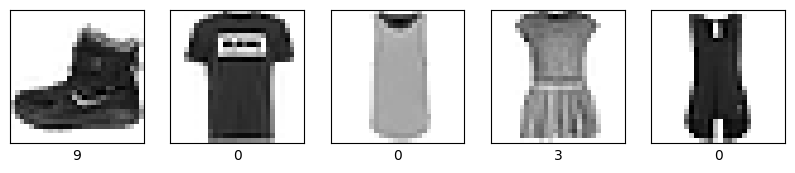

In [64]:
#测试下载好没有

print(f"训练集图像的形状: {train_images.shape}")
print(f"训练集标签的数量: {len(train_labels)}")
print(f"测试集图像的形状: {test_images.shape}")
print(f"测试集标签的数量: {len(test_labels)}")

# 显示前5张训练图片

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()



In [66]:
#预先处理数据

train_images = train_images / 255.0
test_images = test_images / 255.0


In [70]:
#构建模型

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 将二维图像展开成一维
    tf.keras.layers.Dense(128, activation='relu'), # 隐藏层
    tf.keras.layers.Dense(10, activation='softmax') # 输出层
])


In [72]:
#编译模型

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [74]:
#训练模型

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.7823 - loss: 0.6279
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8631 - loss: 0.3810
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.8765 - loss: 0.3374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8855 - loss: 0.3088
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.8909 - loss: 0.2975
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.8963 - loss: 0.2823
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.8995 - loss: 0.2698
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9049 - loss: 0.2527
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.9077 - loss: 0.2461
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.9148 - loss: 0.2306


In [76]:
#评估结果

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"测试集的准确率: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8815 - loss: 0.3406
测试集的准确率: 0.881600022315979


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step


C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


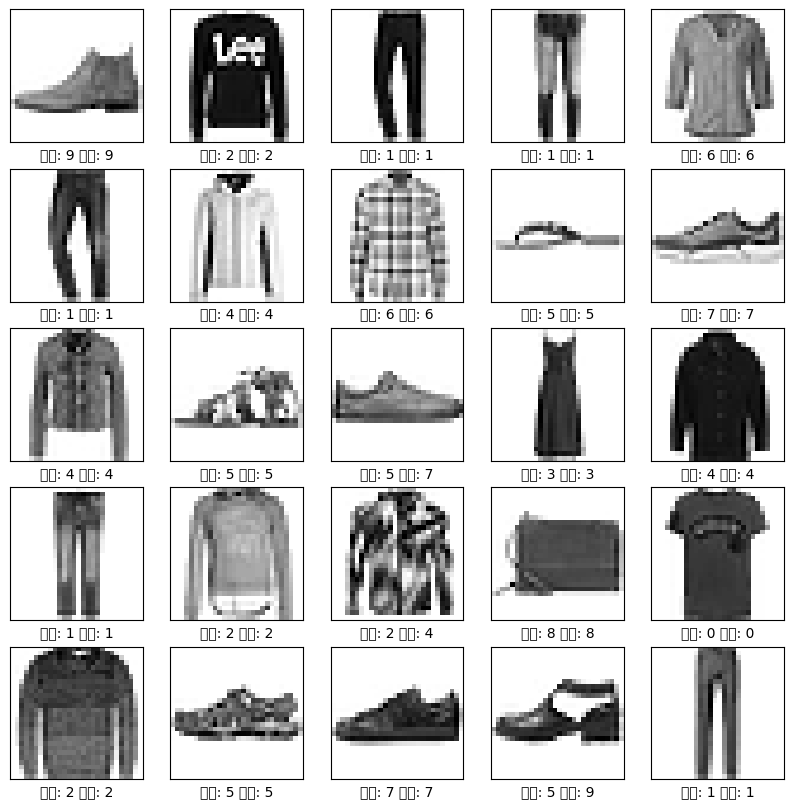

In [78]:
#可视化结果

predictions = model.predict(test_images)

# 显示前25张测试图片、预测结果和真实标签
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"预测: {np.argmax(predictions[i])} 真实: {test_labels[i]}")
plt.show()


In [ ]:
#后续： 优化模型，以提高分类准确率。

In [80]:
# 构建更复杂的模型

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # 增加神经元数量
    tf.keras.layers.Dense(128, activation='relu'),  # 添加额外的隐藏层
    tf.keras.layers.Dense(64, activation='relu'),   # 添加更多的隐藏层
    tf.keras.layers.Dense(10, activation='softmax')  # 输出层
])

# 编译模型

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7799 - loss: 0.6226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8643 - loss: 0.3698
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8788 - loss: 0.3280
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8872 - loss: 0.3046
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8952 - loss: 0.2830
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.2762
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9056 - loss: 0.2520
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9055 - loss: 0.2495
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9088 - loss: 0.2433
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9140 - loss: 0.2287


In [82]:
#使用卷积神经网络（CNN）
# 使用CNN模型

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # 第一层卷积层
    tf.keras.layers.MaxPooling2D((2, 2)),                  # 第一层池化层
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # 第二层卷积层
    tf.keras.layers.MaxPooling2D((2, 2)),                  # 第二层池化层
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),          # 全连接层
    tf.keras.layers.Dense(10, activation='softmax')         # 输出层
])

# 编译模型

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10


C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7752 - loss: 0.6155
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8867 - loss: 0.3156
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9001 - loss: 0.2704
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9149 - loss: 0.2288
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9261 - loss: 0.2008
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9339 - loss: 0.1748
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9431 - loss: 0.1537
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9511 - loss: 0.1320
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9553 - loss: 0.1193
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9626 - loss: 0.1024


In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 数据增强 数据增强（Data Augmentation）是一种生成更多训练数据的技术，通常用于防止过拟合。
# 可以使用tf.keras.preprocessing.image.ImageDataGenerator来增强数据，例如旋转、平移、翻转等操作

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 重新定义模型，明确输入形状 应该期望输入是一个四维的张量

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 利用数据增强来训练模型
datagen.fit(train_images.reshape(-1, 28, 28, 1))
model.fit(datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
          epochs=10)




Epoch 1/10


C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  26/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2273 - loss: 2.1706  

C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6848 - loss: 0.8449
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8144 - loss: 0.4894
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8435 - loss: 0.4164
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8585 - loss: 0.3796
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8673 - loss: 0.3532
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8737 - loss: 0.3407
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8782 - loss: 0.3270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8802 - loss: 0.3144
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8834 - loss: 0.3077
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8888 - loss: 0.2948


In [90]:
# 调整优化器和学习率 尝试不同的优化器（如 RMSprop, SGD, Adamax）或调整学习率来进一步优化模型的训练过程

from tensorflow.keras.optimizers import Adam

# 使用不同的优化器和学习率
model.compile(optimizer=Adam(learning_rate=0.001),  # 调整学习率
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9110 - loss: 0.2364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9272 - loss: 0.1931
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9388 - loss: 0.1658
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9451 - loss: 0.1460
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9524 - loss: 0.1252
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9592 - loss: 0.1088
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9632 - loss: 0.0972
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9691 - loss: 0.0812
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9745 - loss: 0.0692
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0620


In [92]:
# 使用回调函数 Callbacks）可以帮助你在训练过程中动态调整模型的行为，例如早停（Early Stopping）、学习率调度（Learning Rate Scheduler）等。

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 定义回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# 训练模型时使用回调函数
model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels),
          callbacks=[early_stopping, reduce_lr])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0555 - val_accuracy: 0.9122 - val_loss: 0.3521 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0494 - val_accuracy: 0.9140 - val_loss: 0.3758 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0413 - val_accuracy: 0.9125 - val_loss: 0.3886 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9857 - loss: 0.0392 - val_accuracy: 0.9127 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9178 - val_loss: 0.4361 - learning_rate: 2.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9975 - loss: 0.0105 - val_accuracy: 0.9196 - val_loss: 0.4512 - learning_rate: 2.0000e-04


Epoch 1/10
  27/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2327 - loss: 2.1243  

C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6913 - loss: 0.8355 - val_accuracy: 0.8233 - val_loss: 0.4819
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8202 - loss: 0.4823 - val_accuracy: 0.8429 - val_loss: 0.4163
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8454 - loss: 0.4151 - val_accuracy: 0.8678 - val_loss: 0.3501
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8594 - loss: 0.3781 - val_accuracy: 0.8784 - val_loss: 0.3316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8692 - loss: 0.3551 - val_accuracy: 0.8681 - val_loss: 0.3582
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8712 - loss: 0.3432 - val_accuracy: 0.8823 - val_loss: 0.3315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8775 - loss: 0.3258 - val_accuracy: 0.8871 - val_loss: 0.3144
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8820 - loss: 0.3175 - val

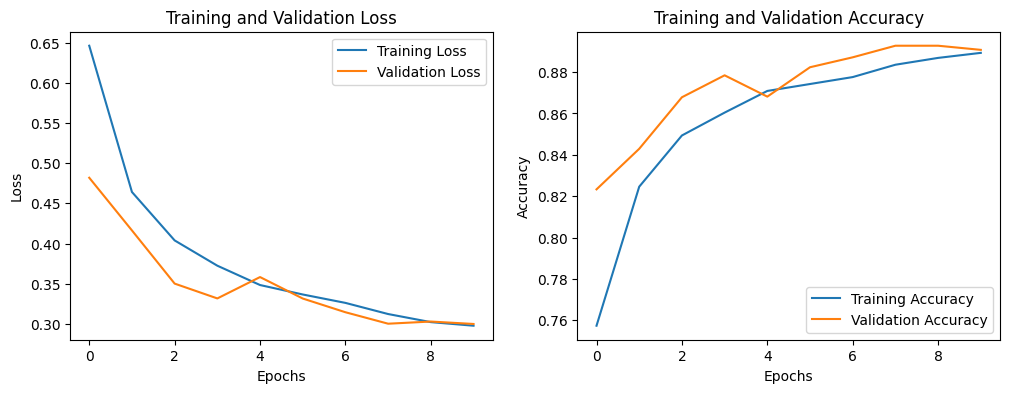

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


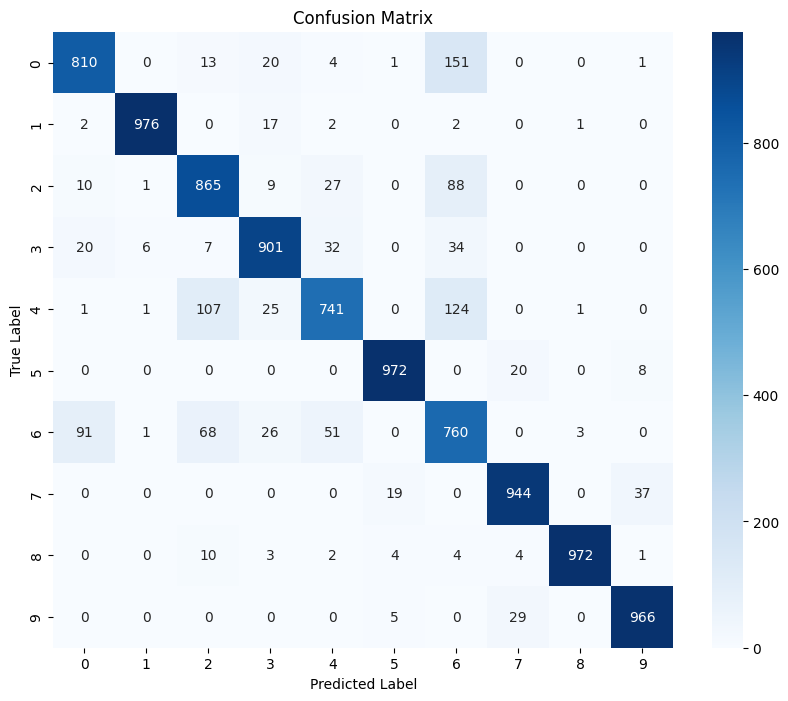

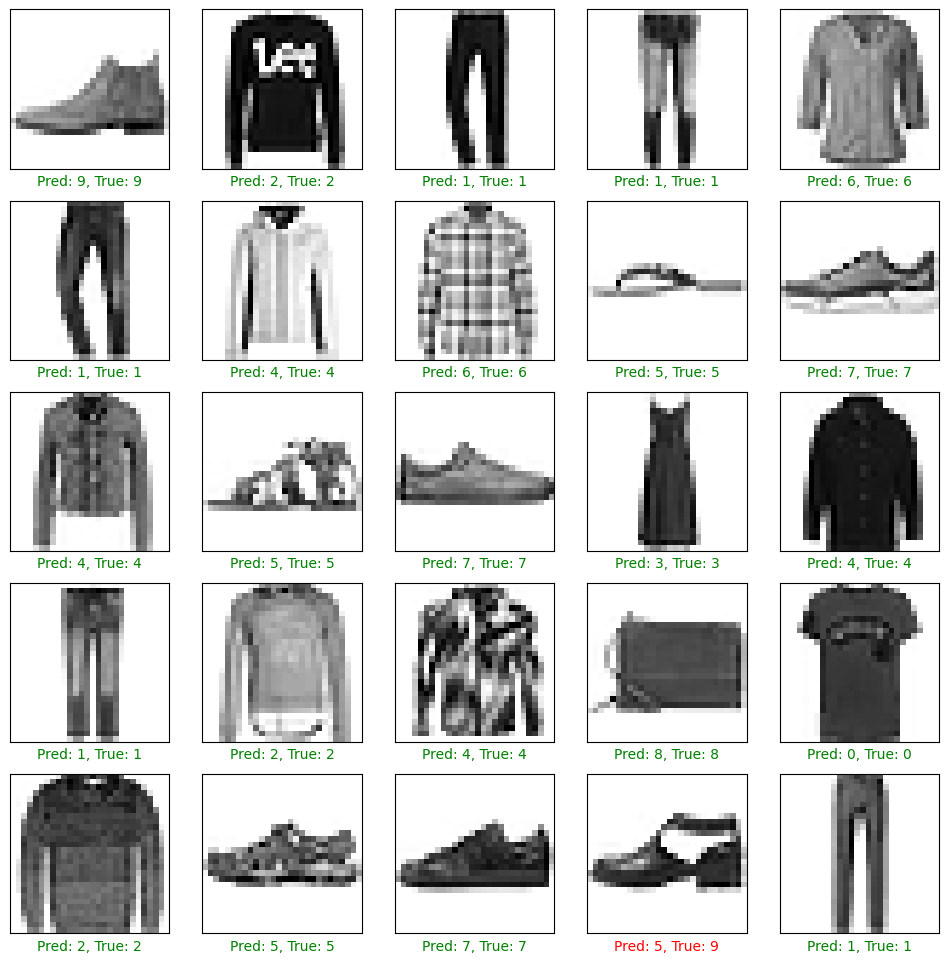

In [108]:
# 导入必要的库
# 无优化

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# 1. 数据增强
# 定义数据增强器

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 使用数据增强器拟合训练数据

datagen.fit(train_images.reshape(-1, 28, 28, 1))

# 2. 构建和编译模型
# 定义CNN模型并明确输入形状

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # 明确指定输入形状
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. 训练模型
# 使用增强数据训练模型，同时使用原始的测试数据进行验证

history = model.fit(
    datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
    epochs=10,
    validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels)
)

# 4. 可视化训练和验证的损失曲线和准确率曲线

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 5. 混淆矩阵可视化

y_pred = np.argmax(model.predict(test_images.reshape(-1, 28, 28, 1)), axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 6. 可视化模型的预测结果

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = y_pred[i]
    true_label = test_labels[i]
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color='green' if predicted_label == true_label else 'red')
plt.show()




Epoch 1/50
  25/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2413 - loss: 2.1383  

C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6998 - loss: 0.8233 - val_accuracy: 0.8391 - val_loss: 0.4423 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8187 - loss: 0.4760 - val_accuracy: 0.8557 - val_loss: 0.3823 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8415 - loss: 0.4185 - val_accuracy: 0.8724 - val_loss: 0.3545 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8587 - loss: 0.3776 - val_accuracy: 0.8642 - val_loss: 0.3688 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8686 - loss: 0.3501 - val_accuracy: 0.8870 - val_loss: 0.3190 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8694 - loss: 0.3429 - val_accuracy: 0.8876 - val_loss: 0.3154 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8771 - loss:

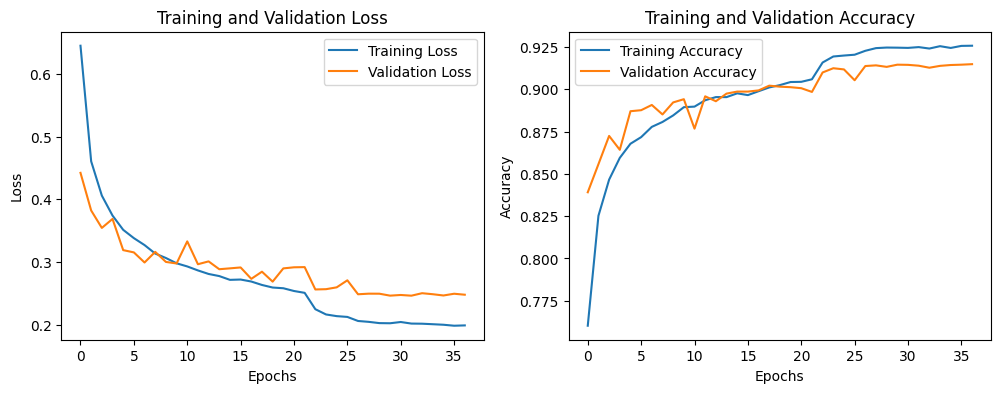

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


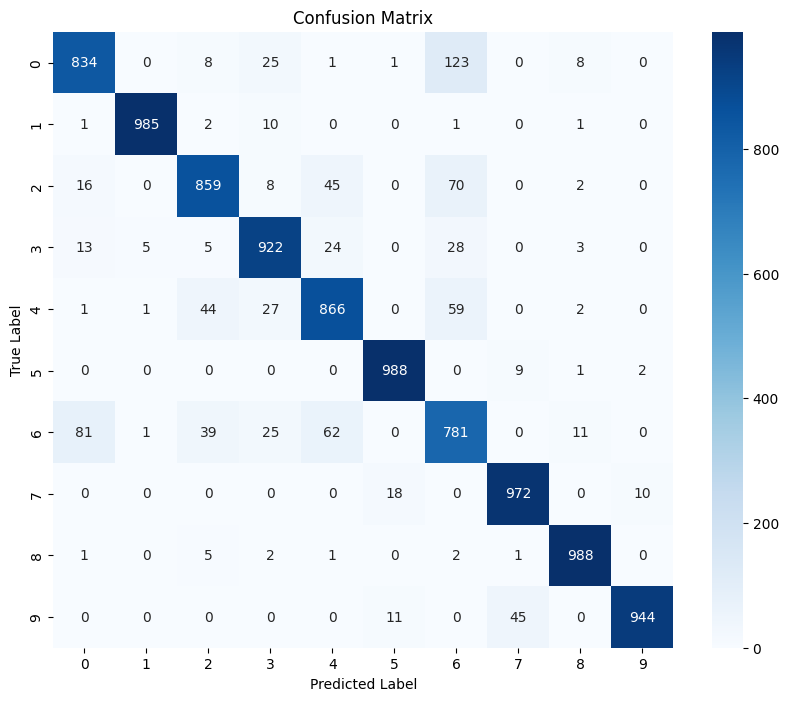

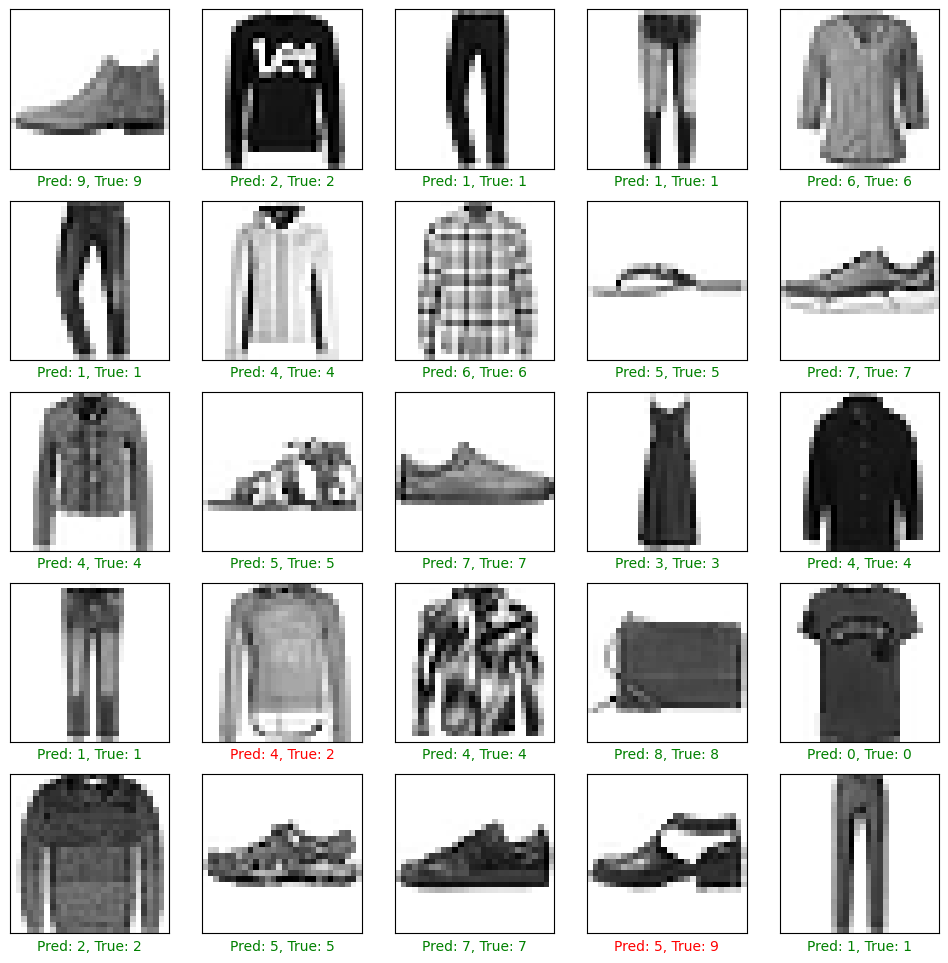

In [110]:
# 增加此整合代码的上面优化代码

# 导入必要的库

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. 数据增强
# 定义数据增强器

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 使用数据增强器拟合训练数据

datagen.fit(train_images.reshape(-1, 28, 28, 1))

# 2. 构建和编译模型
# 定义CNN模型并明确输入形状

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # 明确指定输入形状
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001),  # 使用 Adam 优化器并调整学习率
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. 使用回调函数进行训练
# 定义回调函数：早停和学习率调度

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# 训练模型：增加训练轮次并使用回调函数

history = model.fit(
    datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
    epochs=50,  # 增加训练轮次 10->50
    validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels),
    callbacks=[early_stopping, reduce_lr]  # 添加回调函数
)

# 4. 可视化训练和验证的损失曲线和准确率曲线

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 5. 混淆矩阵可视化

y_pred = np.argmax(model.predict(test_images.reshape(-1, 28, 28, 1)), axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 6. 可视化模型的预测结果

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = y_pred[i]
    true_label = test_labels[i]
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color='green' if predicted_label == true_label else 'red')
plt.show()


Epoch 1/50
  19/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9005 - loss: 0.2353 

C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9238 - loss: 0.1990 - val_accuracy: 0.9142 - val_loss: 0.2474 - learning_rate: 1.6000e-06
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9249 - loss: 0.2030 - val_accuracy: 0.9142 - val_loss: 0.2471 - learning_rate: 1.6000e-06
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9253 - loss: 0.2006 - val_accuracy: 0.9143 - val_loss: 0.2472 - learning_rate: 1.6000e-06
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9269 - loss: 0.1995 - val_accuracy: 0.9138 - val_loss: 0.2473 - learning_rate: 1.6000e-06
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9254 - loss: 0.1976 - val_accuracy: 0.9139 - val_loss: 0.2475 - learning_rate: 1.6000e-06


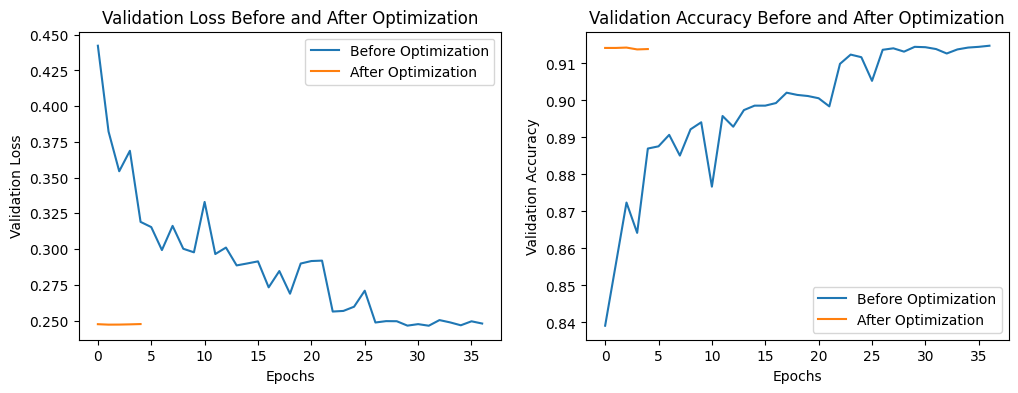

In [112]:
# 保存优化前后的训练历史
history_before = history  # 假设这是优化前的训练历史
history_after = model.fit(  # 假设这是新的优化后的训练历史
    datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
    epochs=50,
    validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels),
    callbacks=[early_stopping, reduce_lr]
)

# 绘制优化前后的训练和验证曲线对比
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_before.history['val_loss'], label='Before Optimization')
plt.plot(history_after.history['val_loss'], label='After Optimization')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Before and After Optimization')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_before.history['val_accuracy'], label='Before Optimization')
plt.plot(history_after.history['val_accuracy'], label='After Optimization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Before and After Optimization')
plt.legend()

plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from PIL import Image
from IPython.display import FileLink

# 使用最佳模型预测测试集中的每个图像
y_pred = np.argmax(model.predict(test_images.reshape(-1, 28, 28, 1)), axis=1)

# 创建文件夹用于存储对比图片
output_dir = './comparison_images'  # 使用当前目录
os.makedirs(output_dir, exist_ok=True)

# 生成每个测试图像的对比图片
for i in range(len(test_images)):
    plt.figure(figsize=(2, 2))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = y_pred[i]
    true_label = test_labels[i]
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color='green' if predicted_label == true_label else 'red')
    
    # 保存图片文件
    file_path = os.path.join(output_dir, f'comparison_{i}.png')
    plt.savefig(file_path)
    plt.close()

# 将所有图片文件打包成一个zip文件
zip_path = './comparison_images.zip'  # 使用当前目录
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, _, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

# 提供下载链接
FileLink(zip_path)


